In [195]:
import numpy as np
import matplotlib.pyplot as plt
import json

# Define studied plots

In [55]:
monitored_runs = ["../results/BiLSTMConfig/20180308_175823-65f4/",
                  "../results/LSTMConfig/20180313_165601-95fa/",
                  "../results/BiLSTMConfig/20180313_165245-1b21/",
                  "../results/BiLSTMConfig/20180313_172053-d7c2/",
                  "../results/BiLSTMConfig/20180313_172716-30fd/",
                  "../results/BiLSTMConfig/20180313_174443-d935/",
                  "../results/BiLSTMConfig/20180313_173252-d9c8/",
                  "../results/BiLSTMConfig/20180313_182508-691a/",
                 ]

labels = ["base Bi-LSTM",
          "LSTM, hidden layer = 50, learning rate .005",
          "Bi-LSTM, hidden layer = 50, learning rate .005",
          "Bi-LSTM, hidden layer = 100, learning rate .005",
          "Bi-LSTM, hidden layer = 200, learning rate .005",
          "Bi-LSTM, hidden layer = 100, learning rate .01",
          "Bi-LSTM, hidden layer = 200, learning rate .01",
          "Bi-LSTM, hidden layer = 200, learning rate .02"]

In [197]:
class RunResult(object):
    def load_los_file(self, filename):
        values = []
        with open(self.runpath + filename, 'r') as f:
            for l in f:
                values.append(float(l.strip()))
        return values
    
    def filenames(self):
        return ["dev_f1.los", "dev_losses.los", "dev_precision.los", "dev_recall.los",
                "train_f1.los", "train_losses.los", "train_precision.los", "train_recall.los"]
    
    def __init__(self, runpath):
        self.runpath = runpath
        self.results_dic = {}
        for filename in self.filenames():
            self.results_dic[filename] = self.load_los_file(filename)
        with open(self.runpath + "params.json") as f:
            self.params = json.load(f)

In [198]:
all_results = [RunResult(monitored_run) for monitored_run in monitored_runs]

In [199]:
all_results[2].params

{'adaptative_lr': False,
 'batch_size': 128,
 'data_train': 'data/ner_dataset.csv',
 'ee': False,
 'extra_layer': False,
 'hidden_size': 50,
 'l2': None,
 'learning_rate': 0.005,
 'model': 'bilstm',
 'n_epochs': 30,
 'no_result': False,
 'other_layer_size': 20,
 'tiny': False,
 'train_fraction': 0.9,
 'vectors': 'data/en-cw.txt'}

# Plots

### Train loss evolution per config

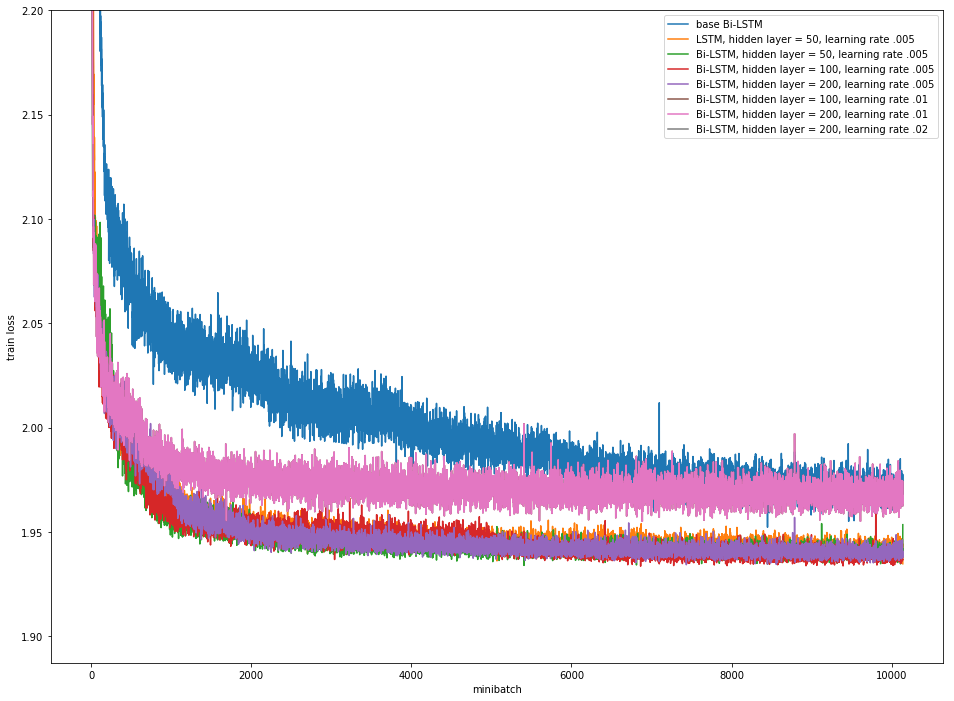

In [56]:
plt.figure(figsize = (16, 12))

for result, label in zip(all_results, labels):    
    plt.plot(result.results_dic["train_losses.los"], label = label)

plt.xlabel("minibatch")
plt.ylabel("train loss")
plt.ylim(top=2.2)
plt.legend()
    
plt.show()

### Train F1 evolution per config

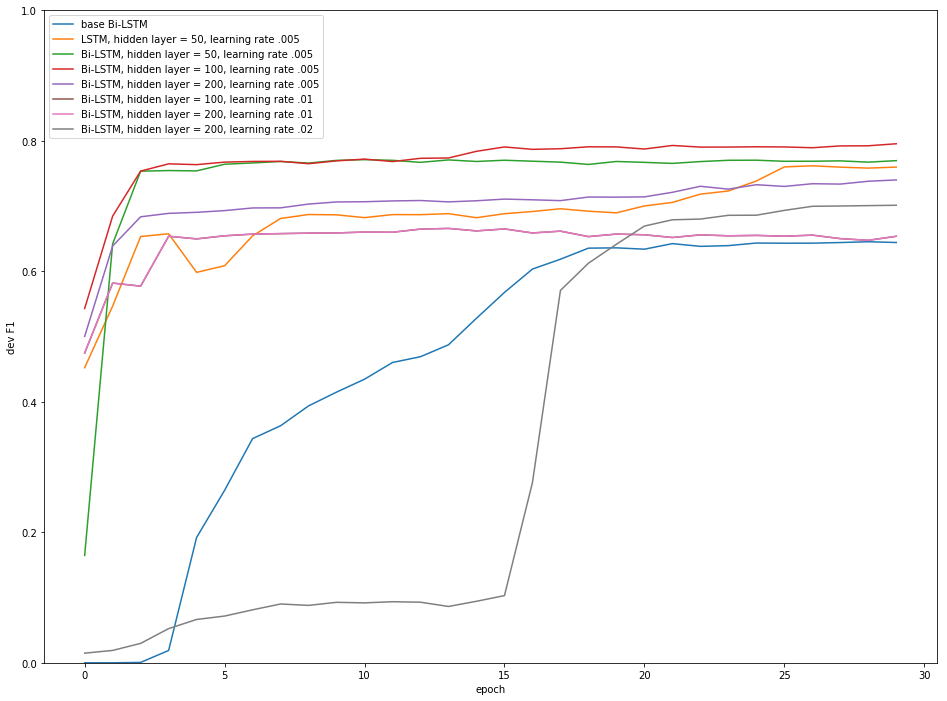

In [57]:
plt.figure(figsize = (16, 12))

for result, label in zip(all_results, labels):    
    plt.plot(result.results_dic["dev_f1.los"], label = label)

plt.xlabel("epoch")
plt.ylabel("dev F1")
plt.legend(loc="upper left")
    
plt.ylim((0, 1))
plt.show()

## Comparing different L2 regularisations

Building on the bi-LSTM model, studying the influence of regularization alone.

In [58]:
l2_monitored_runs = [
    "../results/BiLSTMConfig/20180313_165245-1b21/",
    "../results/BiLSTMConfig/20180319_134829-bb71/",
    "../results/BiLSTMConfig/20180319_134332-1dc7/",
    "../results/BiLSTMConfig/20180319_121654-1e44/",
    "../results/BiLSTMConfig/20180319_161924-1bb6/",
    "../results/BiLSTMConfig/20180319_121726-c049/",
    "../results/BiLSTMConfig/20180319_161955-302f/",
    "../results/BiLSTMConfig/20180319_120200-d317/",
    "../results/BiLSTMConfig/20180319_162032-b9d4/",
    "../results/BiLSTMConfig/20180319_134309-1c0f/",
    "../results/BiLSTMConfig/20180319_110518-e838/",
    "../results/BiLSTMConfig/20180319_111222-31f8/",
    "../results/BiLSTMConfig/20180319_110457-658f/"
]

l2_labels = [
    "Bi-LSTM, extra layer size = 50, lr .005 (baseline)",
    "baseline - l2 reg beta = 2e-6",
    "baseline - l2 reg beta = 5e-06",
    "baseline - l2 reg beta = 1e-05",
    "baseline - l2 reg beta = 1.25e-05",
    "baseline - l2 reg beta = 2e-05",
    "baseline - l2 reg beta = 3e-05",
    "baseline - l2 reg beta = 5e-05",
    "baseline - l2 reg beta = 6e-05",
    "baseline - l2 reg beta = 8e-05",
    "baseline - l2 reg beta = 1e-04",
    "baseline - l2 reg beta = 5e-04",
    "baseline - l2 reg beta = 1e-03",
]

l2_results = [RunResult(monitored_run) for monitored_run in l2_monitored_runs]

In [59]:
l2_results[0].params

{'adaptative_lr': False,
 'batch_size': 128,
 'data_train': 'data/ner_dataset.csv',
 'ee': False,
 'extra_layer': False,
 'hidden_size': 50,
 'l2': None,
 'learning_rate': 0.005,
 'model': 'bilstm',
 'n_epochs': 30,
 'no_result': False,
 'other_layer_size': 20,
 'tiny': False,
 'train_fraction': 0.9,
 'vectors': 'data/en-cw.txt'}

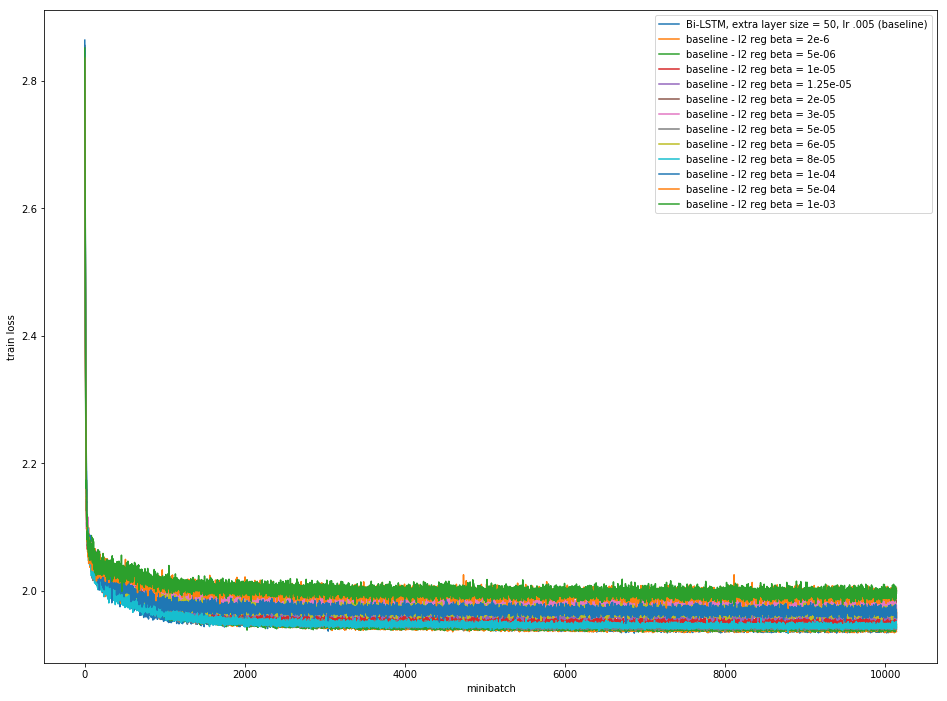

In [60]:
plt.figure(figsize = (16, 12))

for result, label in zip(l2_results, l2_labels):    
    plt.plot(result.results_dic["train_losses.los"], label = label)

plt.xlabel("minibatch")
plt.ylabel("train loss")
# plt.ylim(top=2.2)
plt.legend()
    
plt.show()

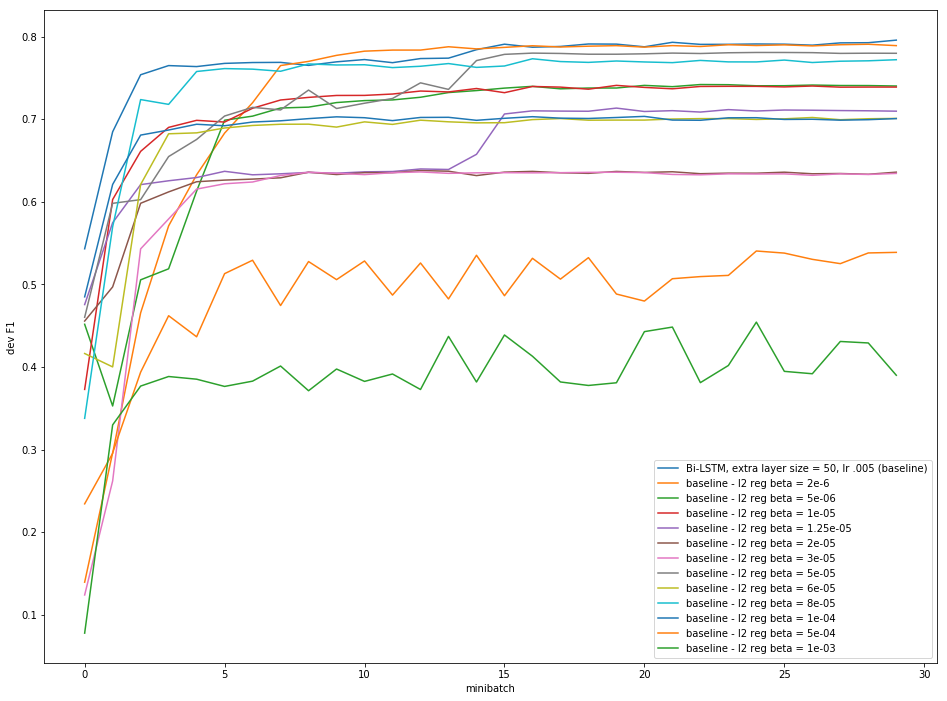

In [63]:
plt.figure(figsize = (16, 12))

for result, label in zip(l2_results, l2_labels):    
    plt.plot(result.results_dic["dev_f1.los"], label = label)

plt.xlabel("minibatch")
plt.ylabel("dev F1")
# plt.ylim(top=2.2)
plt.legend()
    
plt.show()

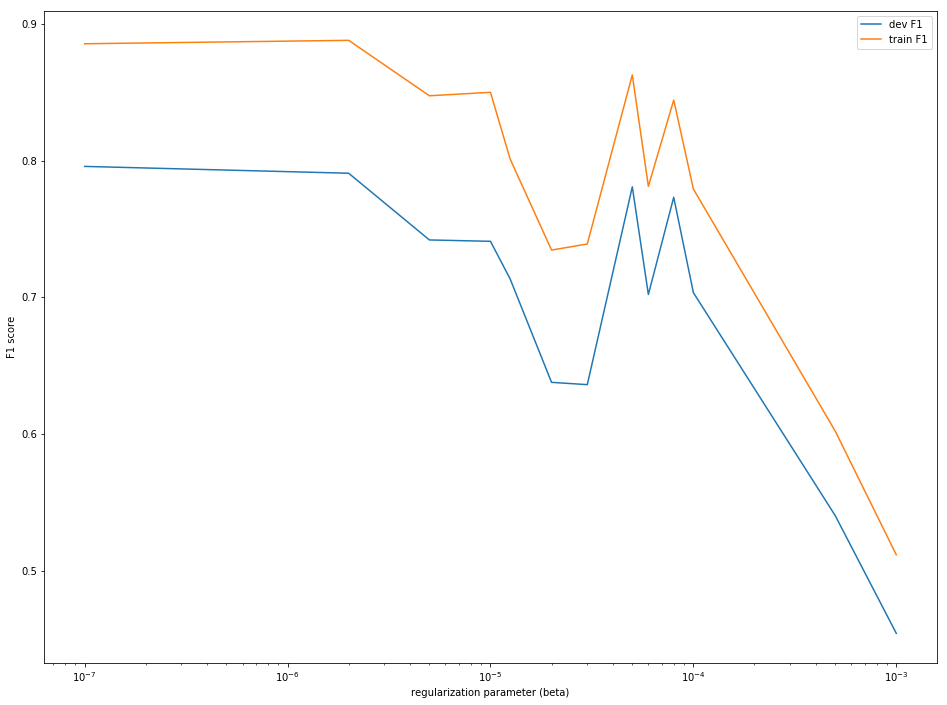

In [62]:
# plot of best dev f1 as function of regularization

plt.figure(figsize = (16, 12))

plt.plot([(r.params["l2"] or 1e-7) for r in l2_results],[np.max(r.results_dic["dev_f1.los"]) for r in l2_results],label="dev F1")
plt.plot([(r.params["l2"] or 1e-7) for r in l2_results],[np.max(r.results_dic["train_f1.los"]) for r in l2_results],label="train F1")


plt.xscale("log")
plt.xlabel("regularization parameter (beta)")
plt.ylabel("F1 score")
# plt.ylim(top=2.2)
plt.legend()

In [40]:
len(l2_labels)

13

## Comparing different dropout rates

Building on the bi-LSTM model, studying the influence of dropout rate alone.

In [42]:
dr_monitored_runs = [
    "../results/BiLSTMConfig/20180313_165245-1b21/",
    "../results/BiLSTMConfig/20180320_131212-7f0c/",
    "../results/BiLSTMConfig/20180319_182814-b7aa/",
    "../results/BiLSTMConfig/20180320_131219-b4d9/",
    "../results/BiLSTMConfig/20180319_183017-58c2/",
    "../results/BiLSTMConfig/20180320_131307-14e2/",
    "../results/BiLSTMConfig/20180319_183019-234f/"
]

dr_labels = [
    "Bi-LSTM, extra layer size = 50, lr .005 (baseline)",
    "baseline - keep rate = 0.995",
    "baseline - keep rate = 0.99",
    "baseline - keep rate = 0.95",
    "baseline - keep rate = 0.9",
    "baseline - keep rate = 0.85",
    "baseline - keep rate = 0.8"
]

dr_results = [RunResult(monitored_run) for monitored_run in dr_monitored_runs]

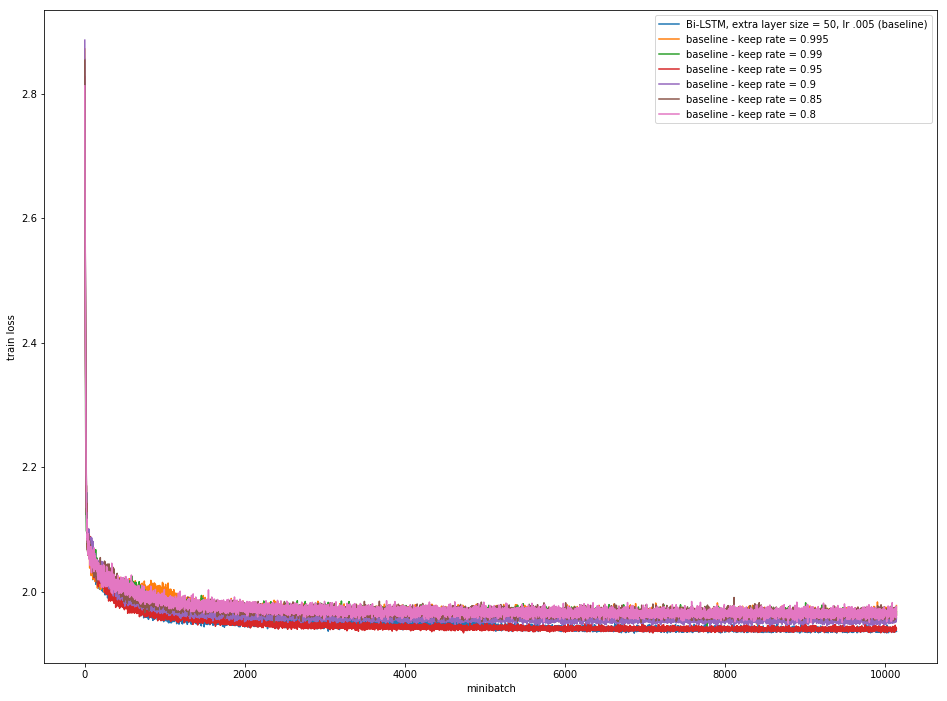

In [43]:
plt.figure(figsize = (16, 12))

for result, label in zip(dr_results, dr_labels):    
    plt.plot(result.results_dic["train_losses.los"], label = label)

plt.xlabel("minibatch")
plt.ylabel("train loss")
# plt.ylim(top=2.2)
plt.legend()
    
plt.show()

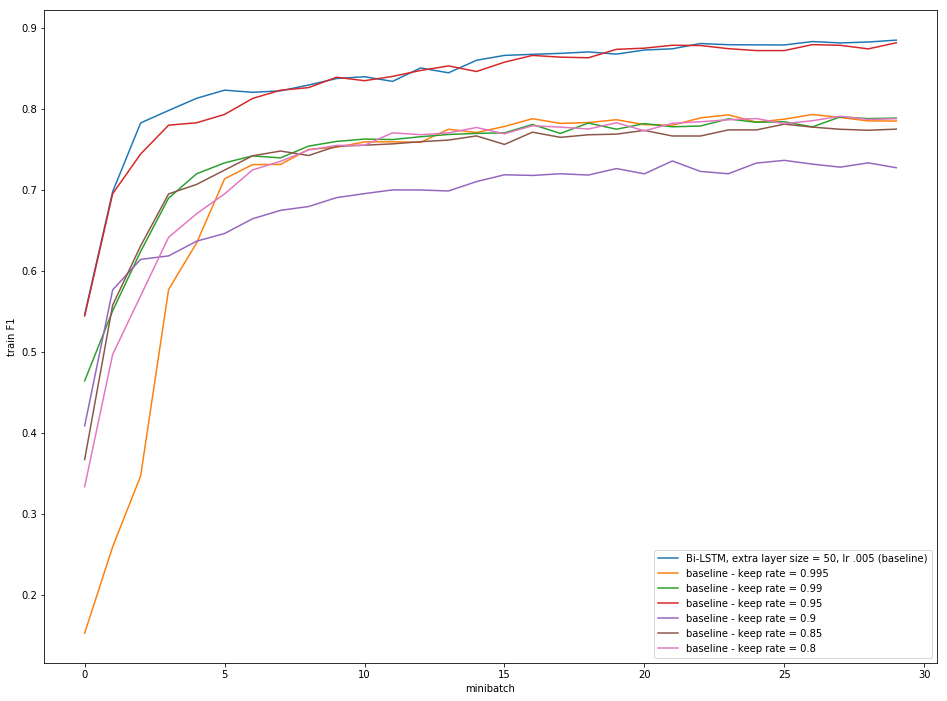

In [44]:
plt.figure(figsize = (16, 12))

for result, label in zip(dr_results, dr_labels):    
    plt.plot(result.results_dic["train_f1.los"], label = label)

plt.xlabel("minibatch")
plt.ylabel("train F1")
# plt.ylim(top=2.2)
plt.legend()
    
plt.show()

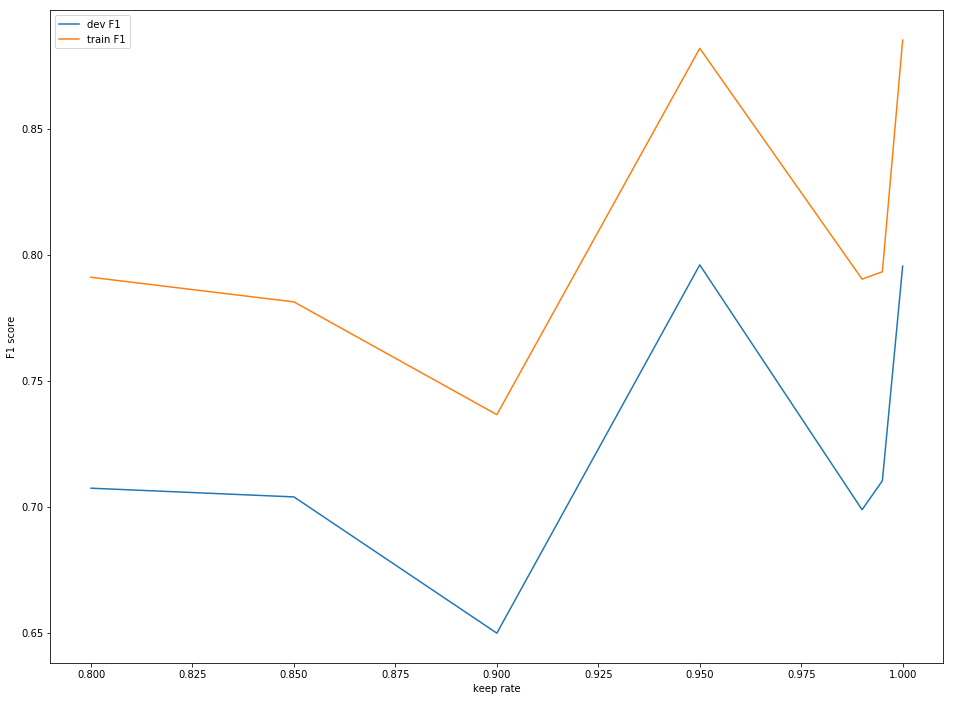

In [52]:
# plot of best dev f1 as function of regularization

plt.figure(figsize = (16, 12))

plt.plot([(1 - r.params.get("dropout",0)) for r in dr_results],[np.max(r.results_dic["dev_f1.los"]) for r in dr_results],label="dev F1")
plt.plot([(1 - r.params.get("dropout",0)) for r in dr_results],[np.max(r.results_dic["train_f1.los"]) for r in dr_results],label="train F1")


plt.xlabel("keep rate")
plt.ylabel("F1 score")
# plt.ylim(top=2.2)
plt.legend()